In [13]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [18]:
def calculate_sr(state : BatsmanState):
    sr = (state['runs'] / state['balls']) * 100
    return {'sr': sr}

In [19]:
def calculate_bpb(state : BatsmanState):
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {'bpb': bpb}

In [20]:
def calculate_boundary_parcent(state : BatsmanState):
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_percent': boundary_percent}

In [21]:
def summary(state: BatsmanState):

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    return {'summary': summary}

In [22]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_parcent', calculate_boundary_parcent)
graph.add_node('summary', summary)

# edge
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_parcent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_parcent', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()

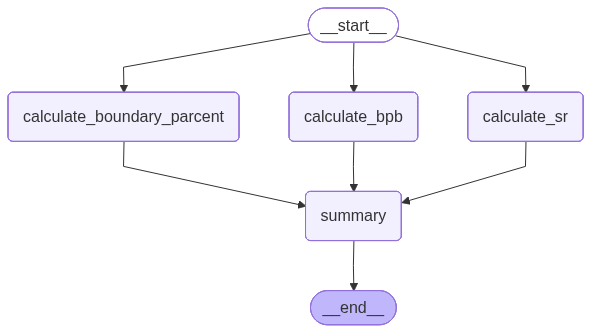

In [23]:
workflow

In [24]:
intial_state = {
    'runs': 90,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

output = workflow.invoke(intial_state)
print(output['summary'])


Strike Rate - 180.0 

Balls per boundary - 5.0 

Boundary percent - 53.333333333333336

